In [2]:
import calendar

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as clr
import matplotlib.collections as mc
import matplotlib.cm as cm
import matplotlib.patches as patches
import mpl_toolkits
import mpl_toolkits.axes_grid1
import seaborn as sns
from IPython.display import HTML

In [3]:
# get names of available example datasets
print(*sns.get_dataset_names())

anagrams anscombe attention brain_networks car_crashes diamonds dots exercise flights fmri gammas geyser iris mpg penguins planets taxis tips titanic


In [3]:
planets = sns.load_dataset('planets')
print(len(planets))
planets.sort_values('distance', inplace=True)
planets.head()

1035


,method,number,orbital_period,mass,distance,year
46,Radial Velocity,1,3.2357,0.0036,1.35,2012
48,Radial Velocity,1,2502.0000,1.5500,3.22,2000
136,Radial Velocity,1,4.6938,0.0350,4.54,2007
145,Radial Velocity,4,124.2600,0.0460,4.70,2010
143,Radial Velocity,4,30.0881,0.7142,4.70,2000


In [4]:
# getting the iris dataset
iris = sns.load_dataset('iris')
print(len(iris))
iris.sort_values('sepal_length', inplace=True)
iris.head()

150


,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa


In [5]:
# getting the iris dataset column names
list( map(lambda s: s.replace('_', ' '), iris.columns.tolist()) )

['sepal length', 'sepal width', 'petal length', 'petal width', 'species']

Two general ways of plotting:

```
plt.hist(X)
```

```
fig, ax = plt.subplots()
ax.hist(X)
```

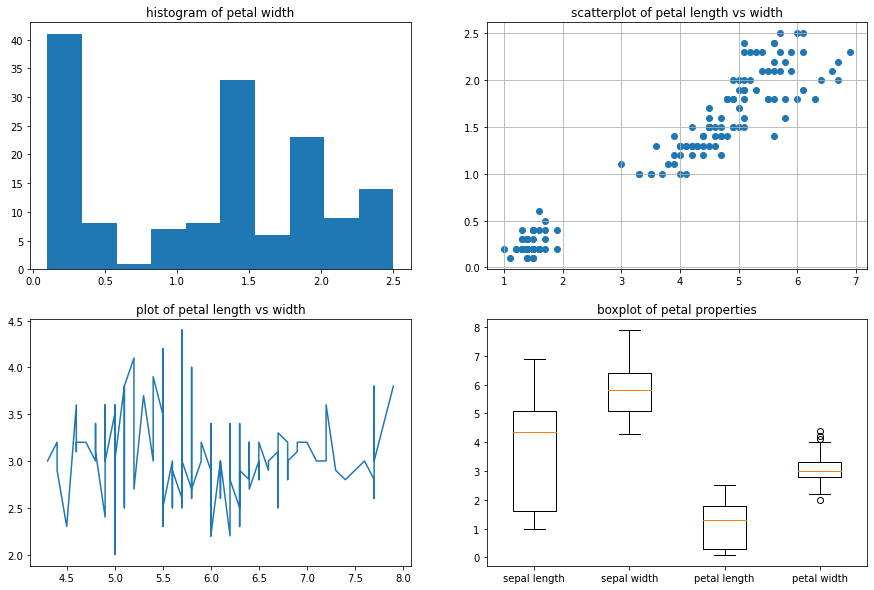

In [7]:
# different kinds of plots

fig, ax = plt.subplots(2,2, figsize=(15, 10))
# if axes doesn't matter, then use ravel()
# ax = ax.ravel()

ax[0,0].hist(iris['petal_width'])
ax[0,0].set_title("histogram of petal width")
ax[0,1].scatter(iris['petal_length'], iris['petal_width'])
ax[0,1].set_title("scatterplot of petal length vs width")
ax[0,1].grid()
ax[1,0].plot(iris['sepal_length'], iris['sepal_width'])
ax[1,0].set_title("plot of petal length vs width")

datasets = (iris['petal_length'], iris['sepal_length'], iris['petal_width'], iris['sepal_width'],)
labels = list( map(lambda s: s.replace('_', ' '), iris.columns.tolist()) )[:4]

ax[1,1].boxplot(datasets, labels=labels)
ax[1,1].set_title("boxplot of petal properties")

None

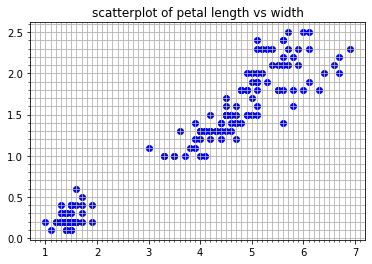

In [8]:
# Minor ticks and gridlines using axis.XAxis and axis.YAxis

ax = plt.gca()

ax.scatter(iris['petal_length'], iris['petal_width'], color="b")
ax.set_title("scatterplot of petal length vs width")
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
ax.grid()
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
None

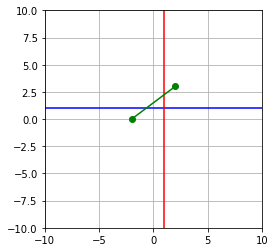

In [17]:
# horizontal and vertical lines
plt.axhline(y=1, color="b")
plt.axvline(x=1, color="r")
# line segment
plt.plot([-2, 2], [0, 3], "-go")
ax = plt.gca()
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.grid()
ax.set_aspect("equal")

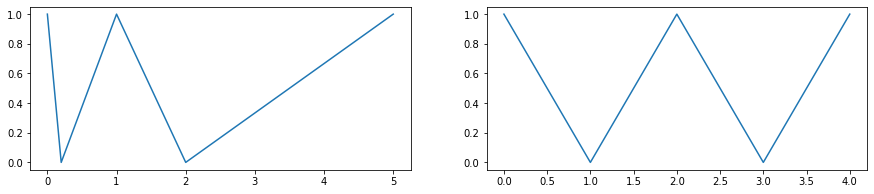

In [4]:
# independent variables (on x-axis) don't have to be evenly spaced.
# when no independent variable is passed, then the range over the length of the dependent variable is used.

fig = plt.figure(figsize=(15, 3))
ax = plt.subplot(121)

x = [0, 0.2, 1, 2, 5]
y = [1, 0  , 1, 0, 1]
plt.plot(x, y)

ax = plt.subplot(122)

y = [1, 0  , 1, 0, 1]
ax.plot(y)
None

In [82]:
# convert color string to RGB tuple
clr.to_rgb('red'), clr.to_rgb('blue'), clr.to_rgb('green'), clr.to_rgba('pink')

((1.0, 0.0, 0.0),
 (0.0, 0.0, 1.0),
 (0.0, 0.5019607843137255, 0.0),
 (1.0, 0.7529411764705882, 0.796078431372549, 1.0))

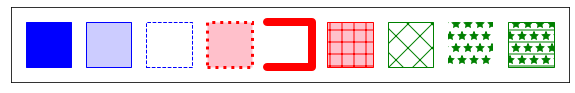

In [87]:
# styling boxes
# hatch styles are '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'
# edge styles are '-', '--', '-.', ':', ''
a = np.array([
    [0, 0],
    [3, 0],
    [3, 3],
    [0, 3]
])
shift = np.array([4, 0])
plt.figure(figsize=(10, 6))
ax = plt.subplot(111)

poly = patches.Polygon(a, color='blue', fc='blue')
ax.add_patch(poly)

tup = list(clr.to_rgba('blue'))
tup[3] = 0.2
poly = patches.Polygon(a + shift, color='blue', fc=tup)
ax.add_patch(poly)

poly = patches.Polygon(a + 2*shift, color='blue', fc='none', ls='--')
ax.add_patch(poly)

poly = patches.Polygon(a + 3*shift, color='red', fc='pink', ls=':', lw=3)
ax.add_patch(poly)

poly = patches.Polygon(a + 4*shift, closed=False, color='red', fc='none', lw=8,
                       capstyle='round', joinstyle='round')
ax.add_patch(poly)

poly = patches.Polygon(a + 5*shift, color='red', fc='pink', hatch='+')
ax.add_patch(poly)

poly = patches.Polygon(a + 6*shift, color='green', fc='none', hatch='x')
ax.add_patch(poly)

poly = patches.Polygon(a + 7*shift, ec='green', fc='none', lw=0, hatch='*')
ax.add_patch(poly)

poly = patches.Polygon(a + 8*shift, ec='green', fc='none', hatch='*-')
ax.add_patch(poly)

ax.set_xlim([-1, 36])
ax.set_ylim([-1, 4])
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect("equal")

In [2]:
# Creating a video animation
# Other methods don't work very well
#=========================================
# Based on:
# https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter

#=========================================
# Create Fake Images using Numpy 
# You don't need this in your code as you have your own imageList.
# This is used as an example.

imageList = []
x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    imageList.append(np.sin(x) + np.cos(y))

#=========================================
# Animate Fake Images (in Jupyter)

def getImageFromList(x):
    return imageList[x]

fig = plt.figure(figsize=(10, 10))
ims = []
for i in range(len(imageList)):
    im = plt.imshow(getImageFromList(i), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.close()

# Show the animation
HTML(ani.to_html5_video())

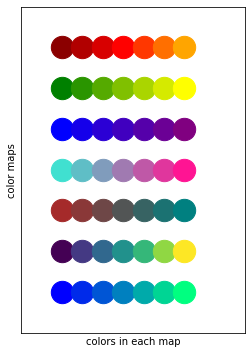

In [26]:
# Color swabs in matplotlib
COLORS = [
    clr.LinearSegmentedColormap.from_list('ro', ['darkred', 'red', 'orange'], N=256),
    clr.LinearSegmentedColormap.from_list('gy', ['green', 'yellow'], N=256),
    clr.LinearSegmentedColormap.from_list('bp', ['blue', 'purple'], N=256),
    clr.LinearSegmentedColormap.from_list('td', ['turquoise', 'deeppink'], N=256),
    clr.LinearSegmentedColormap.from_list('bt', ['brown', 'teal'], N=256),
    cm.viridis,
    cm.winter
]
COLORS = list(reversed(COLORS))
n_sample, n_maps = 7, len(COLORS)
_colors = []
for _colormap in COLORS:
    _colors.append(_colormap(np.linspace(0, 1, n_sample)))

plt.figure(figsize=(6, 6))
for j in range(0, n_maps):
    for i in range(0, n_sample):
        plt.scatter(i / 2, j, color=_colors[j][i], s=500)

ax = plt.gca()
ax.set_aspect('equal')
ax.set_xlim([-1, n_sample / 2 + 1])
ax.set_ylim([-1, n_maps])
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel('colors in each map')
ax.set_ylabel('color maps')
None

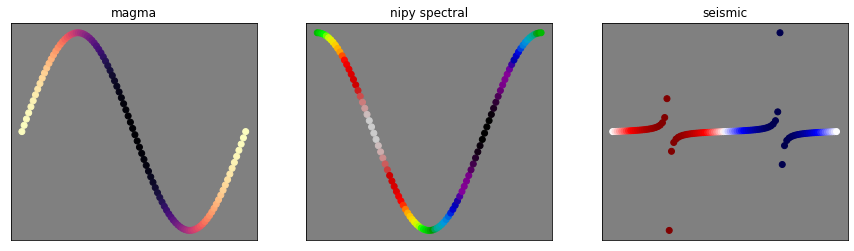

In [11]:
# Using plt.figure(), fig.add_subplot() and fig.axes
# Scatter plots, programmically mapping each point with a color from the colormap.
# https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python

# Note there is no exact parallel using plt.plot()
# https://stackoverflow.com/questions/8500700/how-to-plot-a-gradient-color-line-in-matplotlib/25941474#25941474

N = 100
x = np.linspace(0, 2*np.pi, N)
y = np.sin(x)
c = np.cos(x)
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(131)
ax.scatter(x, y, c=c, cmap=cm.magma, norm=clr.Normalize(vmin=np.min(c), vmax=np.max(c), clip=True))
ax.set_title("magma")
ax = fig.add_subplot(132)
y = np.cos(x)
c = np.sin(x)
ax.scatter(x, y, c=c, cmap=cm.nipy_spectral, norm=clr.Normalize(vmin=np.min(c), vmax=np.max(c), clip=True))
ax.set_title("nipy spectral")
ax = fig.add_subplot(133)
y = np.tan(x)
c = np.sin(x)
ax.scatter(x, y, c=c, cmap=cm.seismic, norm=clr.Normalize(vmin=np.min(c), vmax=np.max(c), clip=True))
ax.set_title("seismic")
for ax in fig.axes:
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_facecolor("grey")

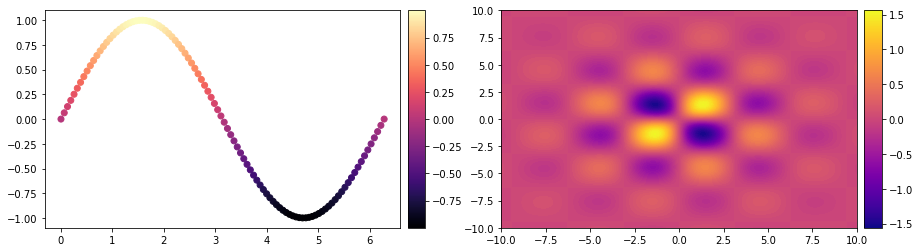

In [2]:
# Insert color bar to plot.

fig = plt.figure(figsize=(15, 4))

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
cmap = cm.magma
norm = clr.Normalize(vmin=np.min(y), vmax=np.max(y), clip=True)
ax = fig.add_subplot(121)
ax.scatter(x, y, c=y, norm=norm, cmap=cmap)
# sidebar of ax
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)

x = np.linspace(-10,10,300)
y = x.copy()
x, y = np.meshgrid(x, y)
f = lambda x, y: 3*np.exp(-np.sqrt((0.1)*(x**2 + y**2)))*np.sin(x)*np.sin(y)
z = f(x, y)
cmap = cm.plasma
norm = clr.Normalize(vmin=np.min(z), vmax=np.max(z), clip=True)
ax = fig.add_subplot(122)
ax.contourf(x, y, z, 100, cmap=cmap)
# sidebar of ax
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)


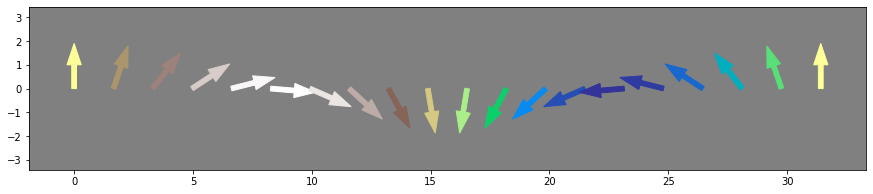

In [24]:
# sampling from a colormap when plotting artifacts one-by-one,
# using clr.Normalize() to remap values to colormap range [0, 1]
N = 20
x = np.linspace(0, 2*np.pi, N)
dx = np.sin(x)
dy = np.cos(x)
c  = np.sin(x)
plt.figure(figsize=(15, 3))
cmap = cm.terrain
norm = clr.Normalize(vmin=-1, vmax=1, clip=True)
for _x, _dx, _dy in zip(x, dx, dy):
    plt.arrow(5*_x, 0, _dx, _dy, width=0.2, color=cmap(norm(_dx)))
plt.axis("equal")
plt.gca().set_facecolor("grey")
None

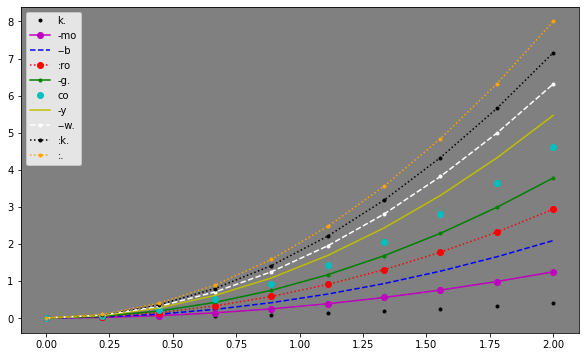

In [44]:
# line style and color settings.
N = 10
K = 10
x = np.linspace(0, 2, N)
a = np.linspace(0.1, 2, K)

plt.figure(figsize=(10, 6))
plt.plot(x, a[0]*x**2, "k.", label="k.")
plt.plot(x, a[1]*x**2, "-mo", label="-mo")
plt.plot(x, a[2]*x**2, "--b", label="--b")
plt.plot(x, a[3]*x**2, ":ro" , label=":ro" )
plt.plot(x, a[4]*x**2, "-g.", label="-g.")
plt.plot(x, a[5]*x**2, "co", label="co")
plt.plot(x, a[6]*x**2, "-y", label="-y")
plt.plot(x, a[7]*x**2, "--w.", label="--w.")
plt.plot(x, a[8]*x**2, ":k.", label=":k.")
plt.plot(x, a[9]*x**2, ":.", color="orange", label=":.")

plt.legend()
plt.gca().set_facecolor("grey")

### Creating custom panels using matplotlib

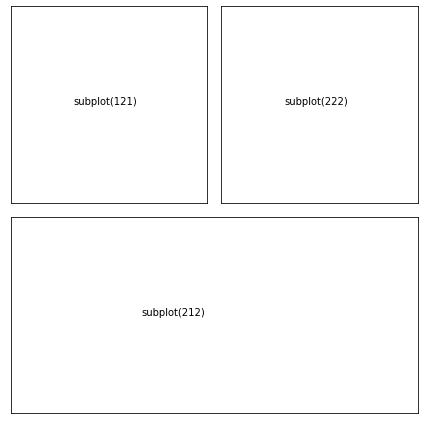

In [45]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(221)
ax.text(0, 0, "subplot(121)")
ax = fig.add_subplot(222)
ax.text(0, 0, "subplot(222)")
ax = fig.add_subplot(212)
ax.text(0, 0, "subplot(212)")
for ax in fig.axes:
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlim([-0.9, 1.9]), ax.set_ylim([-1, 1])
fig.tight_layout()

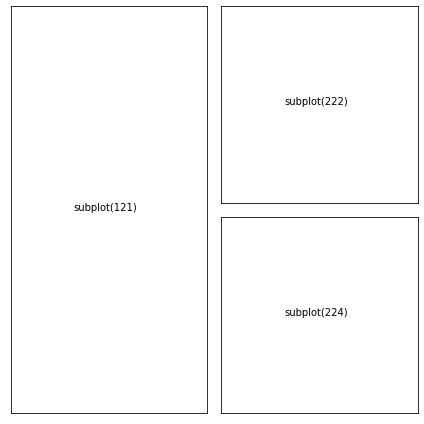

In [47]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(121)
ax.text(0, 0, "subplot(121)")
ax = fig.add_subplot(222)
ax.text(0, 0, "subplot(222)")
ax = fig.add_subplot(224)
ax.text(0, 0, "subplot(224)")
for ax in fig.axes:
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlim([-0.9, 1.9]), ax.set_ylim([-1, 1])
fig.tight_layout()